In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/liar-dataset/train.tsv', sep='\t', header=None)

# Assign column names (as per LIAR documentation - including 'id')
df.columns = [
    "id", "label", "statement", "subject", "speaker", "speaker_job", "state_info",
    "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts",
    "mostly_true_counts", "pants_on_fire_counts", "context"
]

# Show first few rows
df.head()

,id,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [8]:
# Check dimensions
print("Shape:", df.shape)

# Check column types and null values
df.info()

# Describe categorical data
df.describe(include='object')


Shape: (10240, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10240 non-null  object 
 1   label                 10240 non-null  object 
 2   statement             10240 non-null  object 
 3   subject               10238 non-null  object 
 4   speaker               10238 non-null  object 
 5   speaker_job           7342 non-null   object 
 6   state_info            8030 non-null   object 
 7   party_affiliation     10238 non-null  object 
 8   barely_true_counts    10238 non-null  float64
 9   false_counts          10238 non-null  float64
 10  half_true_counts      10238 non-null  float64
 11  mostly_true_counts    10238 non-null  float64
 12  pants_on_fire_counts  10238 non-null  float64
 13  context               10138 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


,id,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,context
count,10240,10240,10240,10238,10238,7342,8030,10238,10138
unique,10240,6,10223,3827,2910,1183,83,23,4345
top,2635.json,half-true,On changing the rules for filibusters on presi...,health-care,barack-obama,President,Texas,republican,a news release
freq,1,2114,3,381,488,492,1009,4497,241


In [9]:
# Check missing values
missing = df.isnull().sum()
print("Missing values:\n", missing)


Missing values:
 id                         0
label                      0
statement                  0
subject                    2
speaker                    2
speaker_job             2898
state_info              2210
party_affiliation          2
barely_true_counts         2
false_counts               2
half_true_counts           2
mostly_true_counts         2
pants_on_fire_counts       2
context                  102
dtype: int64


In [10]:
df.dropna(subset=[
    "subject", "speaker", "party_affiliation",
    "barely_true_counts", "false_counts", "half_true_counts",
    "mostly_true_counts", "pants_on_fire_counts"
], inplace=True)


In [11]:
# Replace NaNs with 'Unknown'
df['speaker_job'].fillna('Unknown', inplace=True)
df['state_info'].fillna('Unknown', inplace=True)
df['context'].fillna('Unknown', inplace=True)


<ipython-input-11-ed30b7f1f39a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['speaker_job'].fillna('Unknown', inplace=True)
<ipython-input-11-ed30b7f1f39a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [12]:
# Final check for any nulls left
print(df.isnull().sum())


id                      0
label                   0
statement               0
subject                 0
speaker                 0
speaker_job             0
state_info              0
party_affiliation       0
barely_true_counts      0
false_counts            0
half_true_counts        0
mostly_true_counts      0
pants_on_fire_counts    0
context                 0
dtype: int64


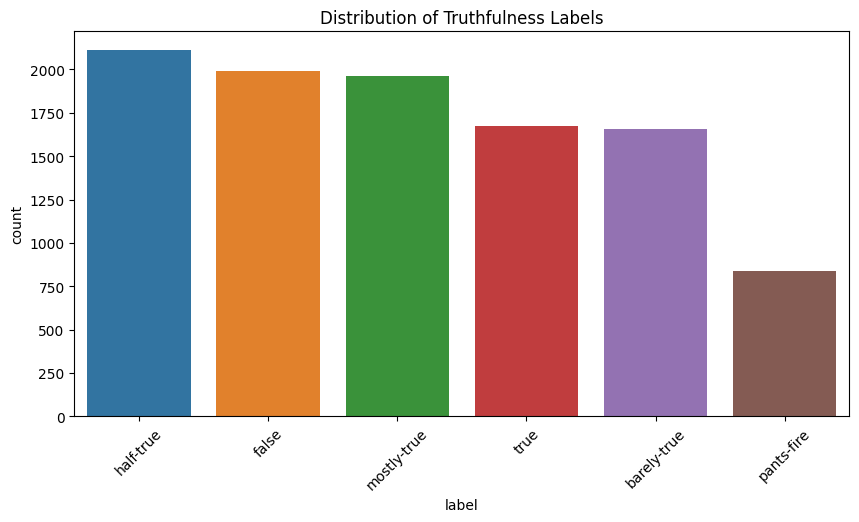

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for labels
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index)
plt.title("Distribution of Truthfulness Labels")
plt.xticks(rotation=45)
plt.show()


Bar Chart

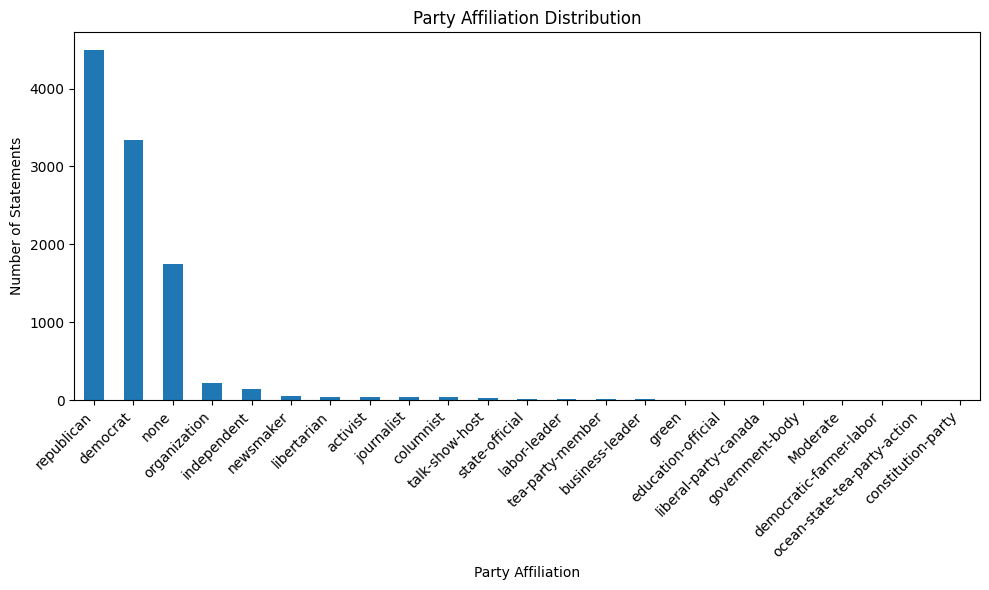

In [16]:
df['party_affiliation'].value_counts().plot(kind='bar', figsize=(10, 6), title='Party Affiliation Distribution')
plt.xlabel('Party Affiliation')
plt.ylabel('Number of Statements')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()
plt.show()

Horizontal Bar Chart

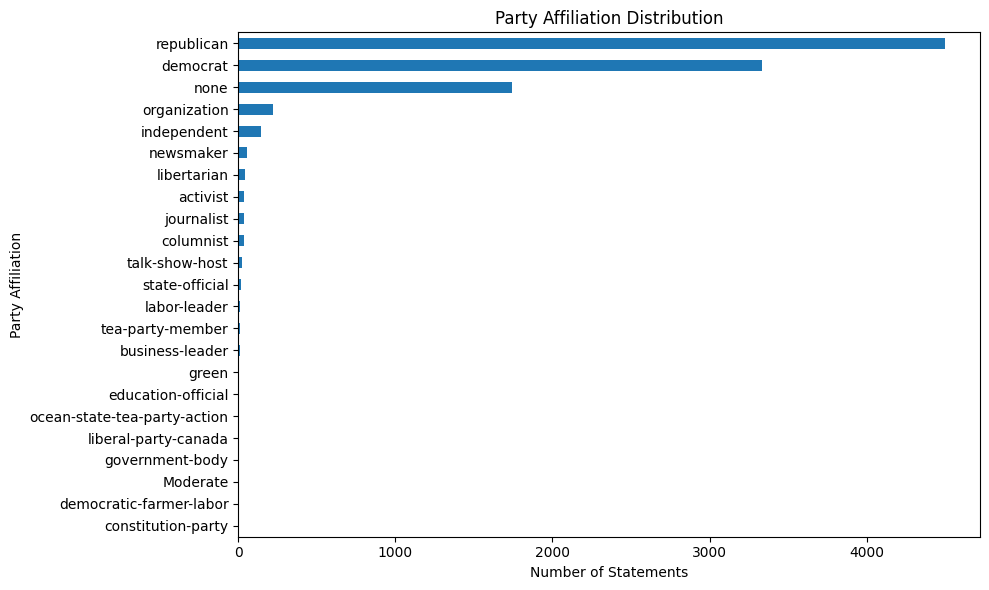

In [17]:
df['party_affiliation'].value_counts().sort_values().plot(kind='barh', figsize=(10, 6), title='Party Affiliation Distribution')
plt.xlabel('Number of Statements')
plt.ylabel('Party Affiliation')
plt.tight_layout()
plt.show()

Focus on Top Categories

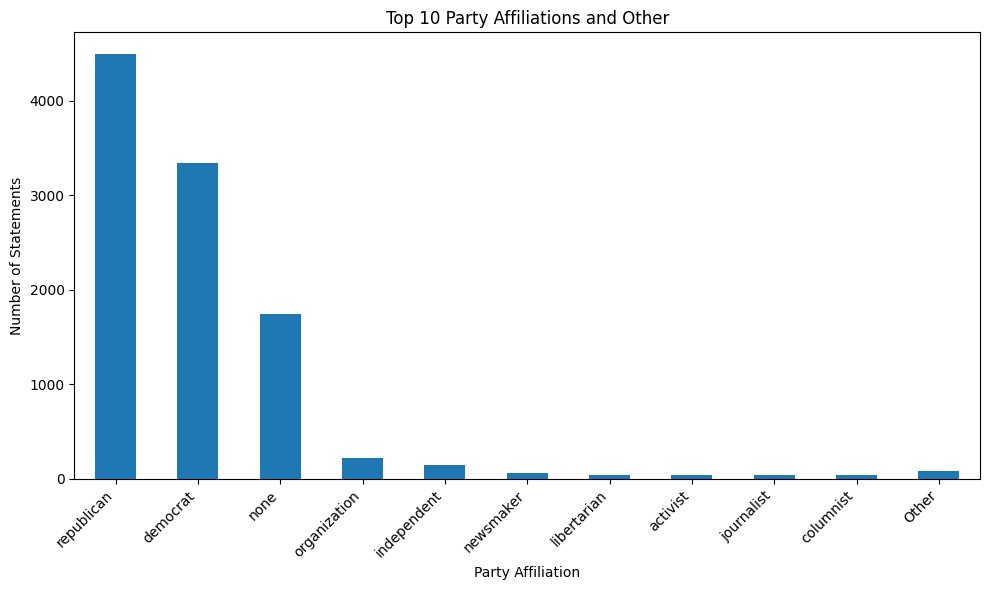

In [18]:
top_n = 10
party_counts = df['party_affiliation'].value_counts()
top_parties = party_counts.head(top_n)
remaining_count = party_counts[top_n:].sum()

top_parties['Other'] = remaining_count

top_parties.plot(kind='bar', figsize=(10, 6), title=f'Top {top_n} Party Affiliations and Other')
plt.xlabel('Party Affiliation')
plt.ylabel('Number of Statements')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Distriubution Party affiliations

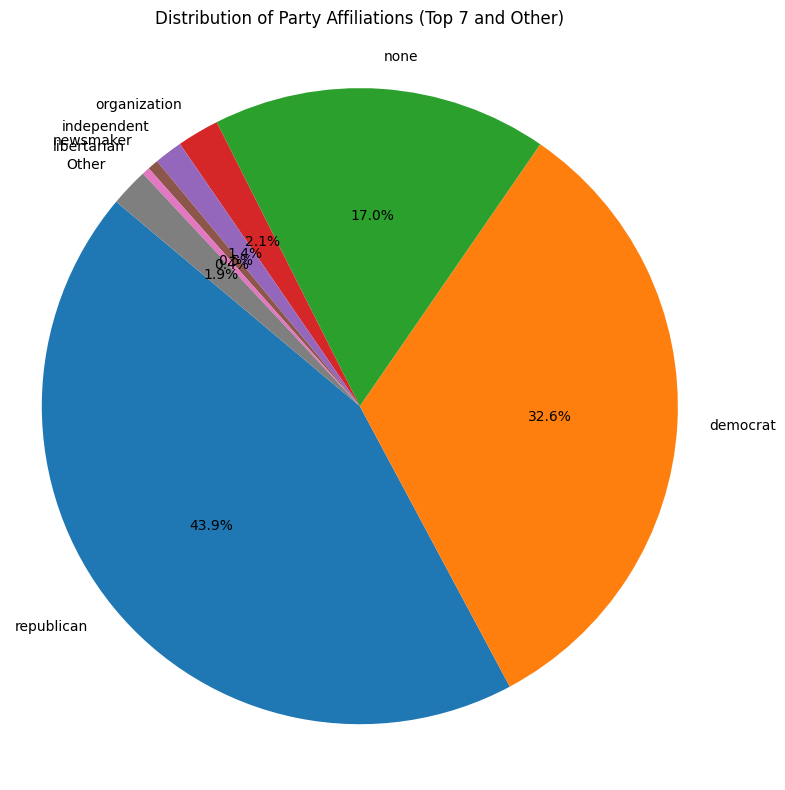

In [19]:
import matplotlib.pyplot as plt

# Get the value counts of party affiliations
party_counts = df['party_affiliation'].value_counts()

# Define the number of top categories to display
top_n = 7

# Get the top N parties and their counts
top_parties = party_counts.head(top_n)

# Calculate the count for the 'Other' category
other_count = party_counts[top_n:].sum()

# Create labels and sizes for the pie chart
labels = top_parties.index.tolist() + ['Other']
sizes = top_parties.values.tolist() + [other_count]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Party Affiliations (Top {} and Other)'.format(top_n))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

Statement Length

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


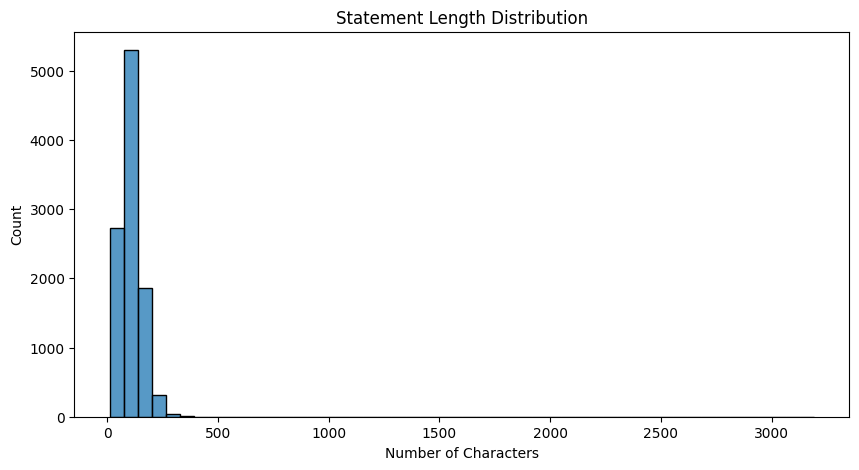

In [20]:
df['statement_len'] = df['statement'].apply(len)

plt.figure(figsize=(10, 5))
sns.histplot(df['statement_len'], bins=50)
plt.title('Statement Length Distribution')
plt.xlabel('Number of Characters')
plt.show()


World Cloud of statements

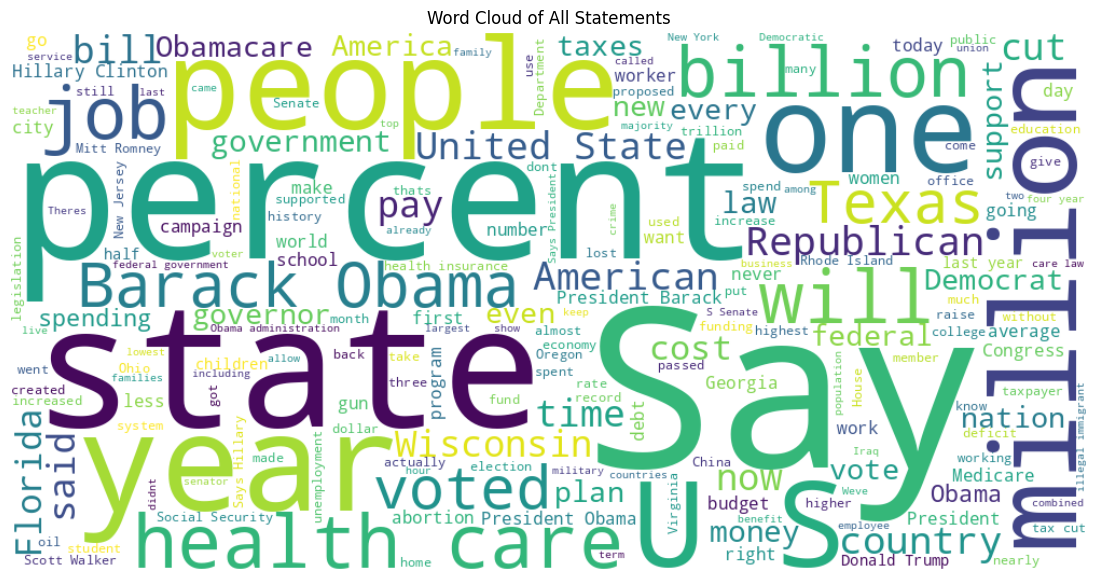

In [21]:
from wordcloud import WordCloud

text = " ".join(df['statement'].dropna().tolist())
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of All Statements")
plt.show()


Save Data

In [22]:
# Save the cleaned file to use in next steps
df.to_csv('/kaggle/working/cleaned_liar_dataset.csv', index=False)
